# Explore here

In [1]:
# Your code here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
star = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv')

In [3]:
star

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A


In [4]:
star.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [5]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [6]:
star['Star category'].value_counts()

Star category
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64

In [7]:
star[['Star type', 'Star category']].value_counts()

Star type  Star category
0          Brown Dwarf      40
1          Red Dwarf        40
2          White Dwarf      40
3          Main Sequence    40
4          Supergiant       40
5          Hypergiant       40
Name: count, dtype: int64

In [8]:
# Transform the numerical values to log values

star.loc[:, 'log T'] = np.log10(star['Temperature (K)'])
star.loc[:,'log L'] = np.log10(star['Luminosity (L/Lo)'])
star.loc[:, 'log R'] = np.log10(star['Radius (R/Ro)'])

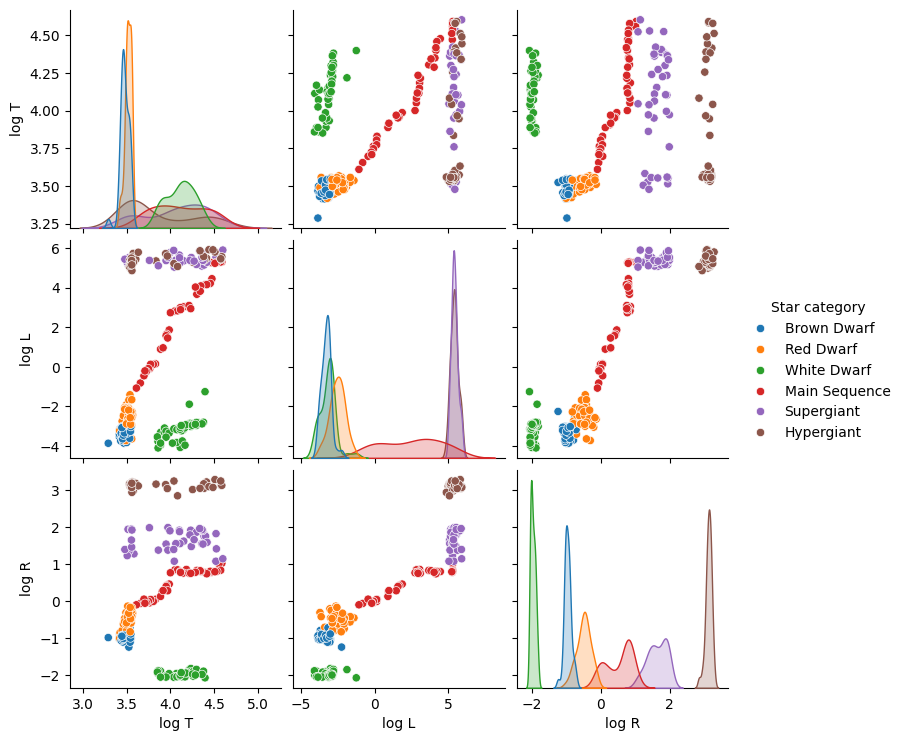

In [9]:
# Pair plot

sns.pairplot(data=star[['log T', 'log L', 'log R', 'Star category']], hue='Star category')

Text(0.5, 1.0, 'HR Diagram')

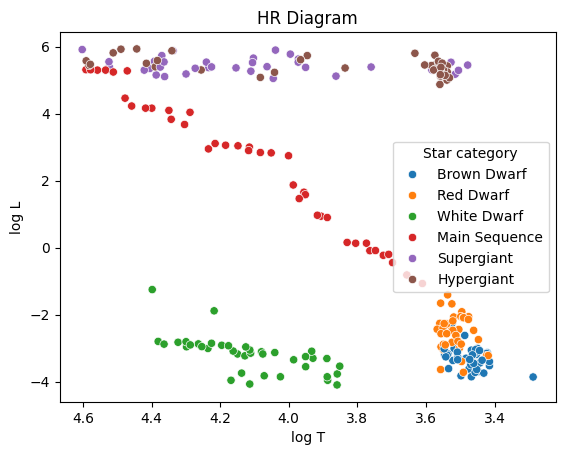

In [10]:
f, ax = plt.subplots()
sns.scatterplot(data=star, x='log T', y='log L', hue='Star category')
ax.invert_xaxis()
ax.set_title('HR Diagram')


In [11]:
# Grab features and label

X = star[['log T', 'log L', 'log R', 'Spectral Class']]
y = star['Star type']

In [12]:
#sns.scatterplot(data=star, x='Star type', y='Star category')

X.head()

,log T,log L,log R,Spectral Class
0,3.486855,-2.619789,-0.769551,M
1,3.483159,-3.301030,-0.811916,M
2,3.414973,-3.522879,-0.991400,M
3,3.447158,-3.698970,-0.795880,M
4,3.287578,-3.860121,-0.987163,M


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['log T', 'log L', 'log R']
categorical_features = ['Spectral Class']

# For numerical values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# One hot encoding - 
# [A] -> [1, 0, 0, ..., 0]
# [B] -> [0, 1, 0, ..., 0]
# ...
# [Z] -> [0, 0, 0, ..., 1]
# Each possible category gets a new "dummy feature column" which can have values of either 0 or 1
# In one hot encoding, it is common to drop one of the new dummy features columns to avoid multicolinearity

# For categorical values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) # In one hot encoding, it is common to drop one of the dummy features to avoid multicolinearity
])

# Combine the two different transformers into one preprocessor for the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])


In [15]:
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 500, 1000],  # Number of trees in random forest
    'classifier__max_depth': [None, 10, 20, 50, 100],      # Maximum depth of the trees
    # Add more hyperparameters to tune as needed
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_enco

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['log '
                                                                          'T',
                                                                          'log '
                                                                          'L',
                                                                          'log '
                                                                          'R']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Spectral '
                                                                          'Class'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20, 50, 100],
                         'classifier__n_estimators': [10, 50, 100, 500, 1000]},
             scoring='accuracy')

In [16]:
results = pd.DataFrame(grid_search.cv_results_)

In [17]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029997,0.011269,0.007540,0.003961,None,10,"{'classifier__max_depth': None, 'classifier__n...",0.974359,0.897436,1.0,0.973684,0.947368,0.958570,0.034805,21
1,0.059660,0.002790,0.006545,0.000418,None,50,"{'classifier__max_depth': None, 'classifier__n...",0.948718,0.897436,1.0,1.000000,0.947368,0.958704,0.038452,16
2,0.119234,0.014726,0.011230,0.002172,None,100,"{'classifier__max_depth': None, 'classifier__n...",0.948718,0.923077,1.0,1.000000,0.947368,0.963833,0.030909,1
3,0.602332,0.095860,0.029217,0.013541,None,500,"{'classifier__max_depth': None, 'classifier__n...",0.948718,0.923077,1.0,1.000000,0.947368,0.963833,0.030909,1
4,1.062886,0.052746,0.035394,0.001211,None,1000,"{'classifier__max_depth': None, 'classifier__n...",0.948718,0.923077,1.0,1.000000,0.947368,0.963833,0.030909,1
5,0.017160,0.000592,0.004613,0.000616,10,10,"{'classifier__max_depth': 10, 'classifier__n_e...",0.974359,0.897436,1.0,0.973684,0.947368,0.958570,0.034805,21
6,0.061990,0.012799,0.007046,0.000755,10,50,"{'classifier__max_depth': 10, 'classifier__n_e...",0.948718,0.897436,1.0,1.000000,0.947368,0.958704,0.038452,16
7,0.102151,0.004781,0.007791,0.000196,10,100,"{'classifier__max_depth': 10, 'classifier__n_e...",0.948718,0.923077,1.0,1.000000,0.947368,0.963833,0.030909,1
8,0.593750,0.116169,0.035974,0.017385,10,500,"{'classifier__max_depth': 10, 'classifier__n_e...",0.948718,0.923077,1.0,1.000000,0.947368,0.963833,0.030909,1
9,1.064826,0.107056,0.050494,0.022490,10,1000,"{'classifier__max_depth': 10, 'classifier__n_e...",0.948718,0.923077,1.0,1.000000,0.947368,0.963833,0.030909,1


<Axes: xlabel='param_classifier__n_estimators', ylabel='mean_test_score'>

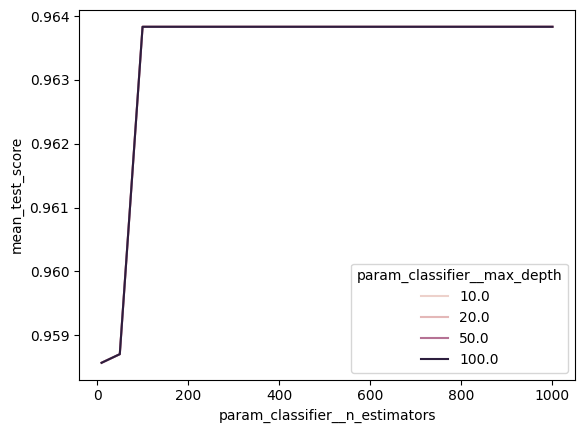

In [43]:
sns.lineplot(data=results, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth')

In [18]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['log T', 'log L', 'log R']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Spectral Class'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [19]:
grid_search.score(X_train, y_train)

1.0

In [20]:
grid_search.score(X_test, y_test)

0.9583333333333334

In [21]:
best_model = grid_search.best_estimator_

import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [23]:
#best_model.predict()

In [28]:
import os

os.getcwd()

'/workspaces/ralexarnold-flask-machine-learning-python-template/src'